In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn


  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.


In [114]:
pip install ipywidgets


     -------------------------------------- 138.3/138.3 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 2.6 MB/s eta 0:00:00
     -------------------------------------- 198.2/198.2 kB 4.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [231]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
import ipywidgets as widgets
from ipywidgets import interact


In [232]:
data_path = r'C:\Users\Z004R6UN\Downloads\archive (10) (1)\Laptop_Train_updated.csv'  # Replace 'path/to/product_reviews.csv' with the actual file path
data = pd.read_csv(data_path)

In [233]:
X = data['Sentence']  # Assuming the column containing the review text is named 'review_text'
y = data['polarity'] 

In [234]:
missing_values = data.isnull().sum()

print(missing_values)

id              0
Sentence        0
Aspect Term     0
polarity       45
from            0
to              0
dtype: int64


In [235]:
data.fillna(2, inplace=True)

# Verify that missing values have been filled
print(data.isnull().sum())

id             0
Sentence       0
Aspect Term    0
polarity       0
from           0
to             0
dtype: int64


In [236]:
y_binary = y.map({0: 0, 1: 1, 2: 2})


In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [238]:
vectorizer = CountVectorizer()

In [239]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [240]:
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [241]:
y_pred = classifier.predict(X_test_vectorized)

In [242]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')


In [243]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Accuracy: 0.7076271186440678
Precision: 0.7090713441813503
Recall: 0.7076271186440678
F1 Score: 0.6978931337938974


In [244]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1_score]

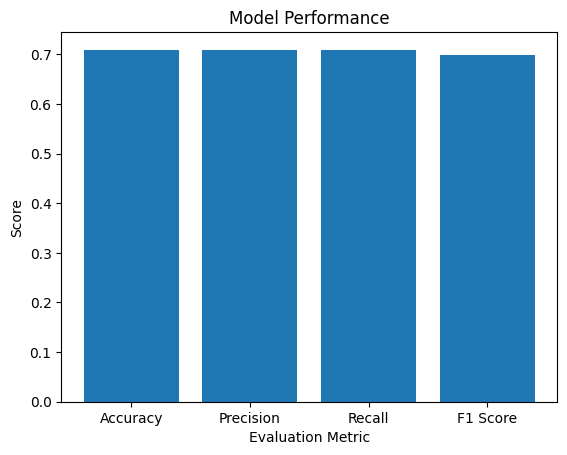

In [245]:
plt.bar(metrics, values)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Model Performance')
plt.show()

In [246]:
cm = confusion_matrix(y_test, y_pred)

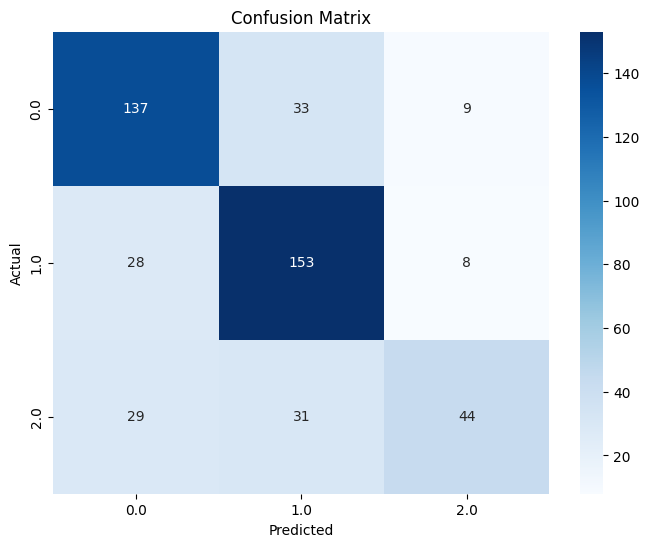

In [247]:
labels = classifier.classes_
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [248]:
from sklearn.metrics import classification_report

In [249]:
report = classification_report(y_test, y_pred)

In [250]:
report

'              precision    recall  f1-score   support\n\n         0.0       0.71      0.77      0.73       179\n         1.0       0.71      0.81      0.75       189\n         2.0       0.72      0.42      0.53       104\n\n    accuracy                           0.71       472\n   macro avg       0.71      0.67      0.67       472\nweighted avg       0.71      0.71      0.70       472\n'

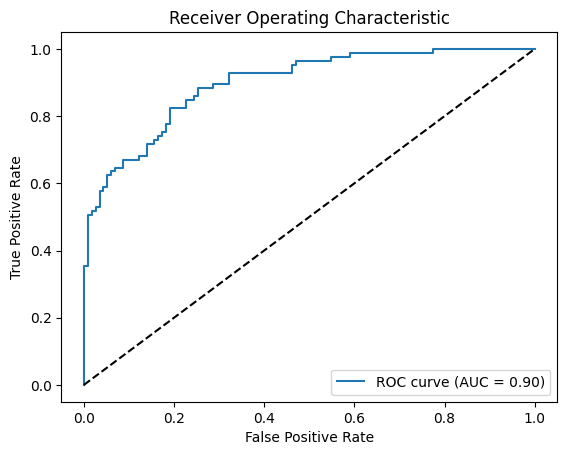

In [251]:
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [252]:
X_vectorized = vectorizer.fit_transform(X)


In [253]:
cv_scores = cross_val_score(classifier, X_vectorized, y, cv=5)

In [254]:
print("Cross-Validation Scores:")
print(cv_scores)
print("Average Cross-Validation Score: {:.2f}".format(cv_scores.mean()))

Cross-Validation Scores:
[0.61228814 0.61864407 0.63559322 0.61146497 0.64118896]
Average Cross-Validation Score: 0.62


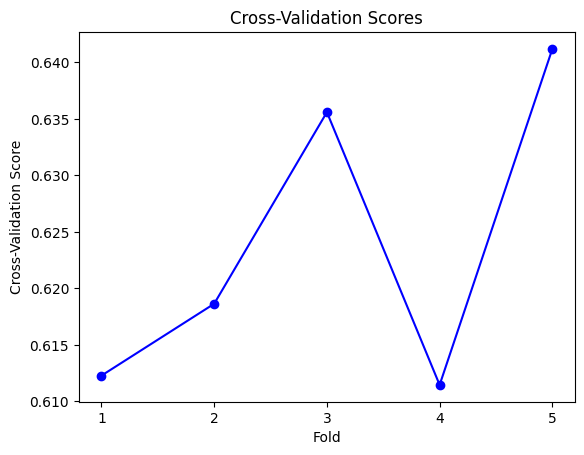

In [255]:
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Fold')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Scores')
plt.xticks(range(1, 6))
plt.show()

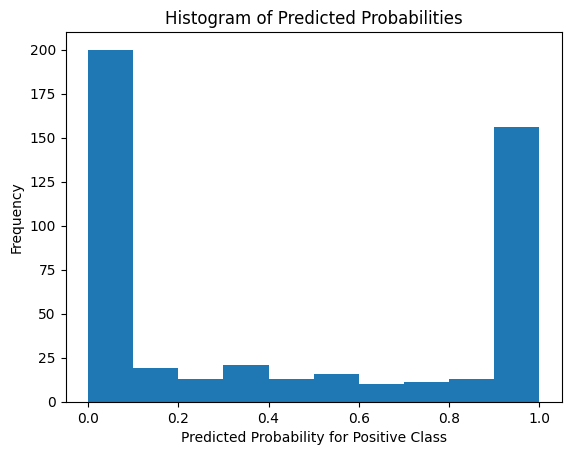

In [256]:
plt.hist(y_pred_prob, bins=10)
plt.xlabel('Predicted Probability for Positive Class')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.show()


In [260]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.7076271186440678
Precision: 0.7090713441813503
Recall: 0.7076271186440678
F1-score: 0.6978931337938974


In [262]:
def plot_precision_recall_curve(threshold):
    # Find the index of the threshold closest to the selected value
    idx = (np.abs(thresholds - threshold)).argmin()
    plt.plot(recall[:-1], precision[:-1], label='Precision-Recall')
    plt.scatter(recall[idx], precision[idx], color='red', label='Threshold: {:.2f}'.format(threshold))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

In [263]:
threshold_slider = widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5)
plt.show()

In [264]:
svm model

SyntaxError: invalid syntax (2431500197.py, line 1)

In [265]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [266]:
classifier = SVC()
classifier.fit(X_train_vectorized, y_train)

SVC()

In [267]:
y_pred = classifier.predict(X_test_vectorized)

In [269]:

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.7055084745762712
Precision: 0.7097741786102237
Recall: 0.7055084745762712
F1-score: 0.6893536555752525


In [270]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

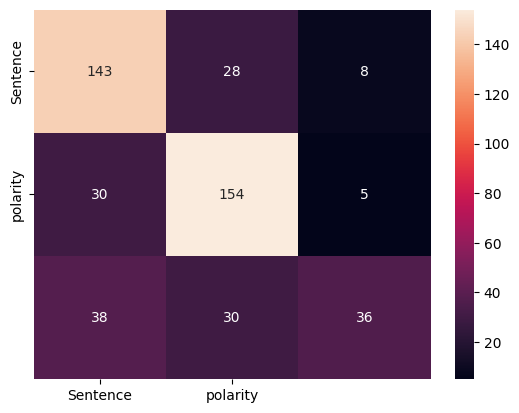

In [272]:
labels = ['Sentence', 'polarity']  # Update with your sentiment labels
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)


In [273]:
from sklearn.neighbors import KNeighborsClassifier


In [274]:
classifier = KNeighborsClassifier()
classifier.fit(X_train_vectorized, y_train)

KNeighborsClassifier()

In [275]:
y_pred = classifier.predict(X_test_vectorized)

In [277]:
accuracy = accuracy_score(y_test, y_pred)

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.5508474576271186
Precision: 0.6119587023998788
Recall: 0.5508474576271186
F1-score: 0.5029035938920738


In [278]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

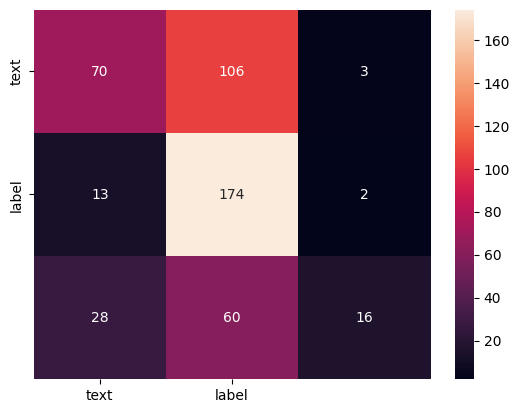

In [279]:
labels = ['text', 'label']  # Update with your sentiment labels
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)

In [283]:
from sklearn.linear_model import LogisticRegression


In [284]:
classifier = LogisticRegression()
classifier.fit(X_train_vectorized, y_train)

D:\anaconda\envs\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [285]:
y_pred = classifier.predict(X_test_vectorized)


In [286]:
accuracy = accuracy_score(y_test, y_pred)

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.701271186440678
Precision: 0.695274858513959
Recall: 0.701271186440678
F1-score: 0.696350388128369


<AxesSubplot:>

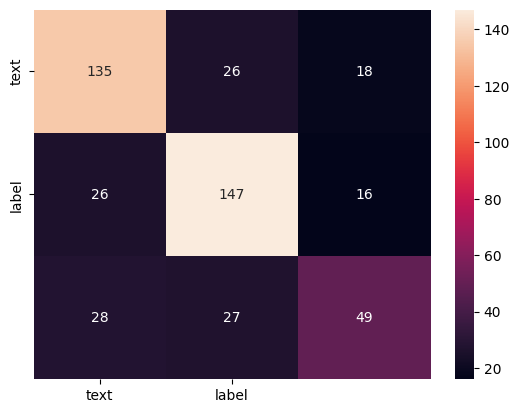

In [287]:
cm = confusion_matrix(y_test, y_pred)
labels = ['text', 'label']  # Update with your sentiment labels
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)

In [288]:
from sklearn.naive_bayes import MultinomialNB


In [289]:
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [290]:
y_pred = classifier.predict(X_test_vectorized)


In [291]:
accuracy = accuracy_score(y_test, y_pred)

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7076271186440678
Precision: 0.7090713441813503
Recall: 0.7076271186440678
F1-score: 0.6978931337938974


<AxesSubplot:>

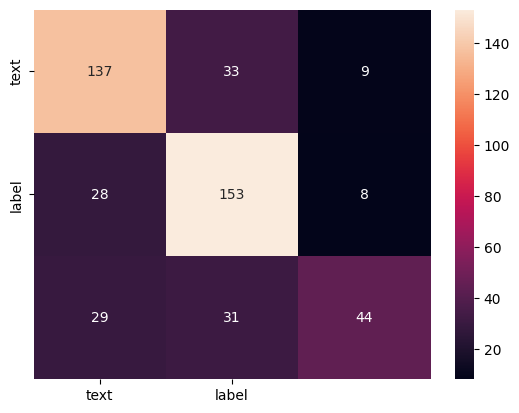

In [292]:
cm = confusion_matrix(y_test, y_pred)
labels = ['text', 'label']  # Update with your sentiment labels
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)

In [293]:
from sklearn.ensemble import RandomForestClassifier


In [294]:
classifier = RandomForestClassifier()
classifier.fit(X_train_vectorized, y_train)

RandomForestClassifier()

In [295]:
y_pred = classifier.predict(X_test_vectorized)


In [296]:
accuracy = accuracy_score(y_test, y_pred)

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7182203389830508
Precision: 0.7139651186424382
Recall: 0.7182203389830508
F1-score: 0.7090347965450065


<AxesSubplot:>

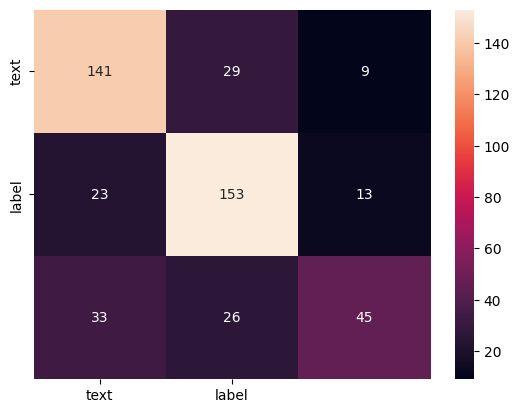

In [297]:
cm = confusion_matrix(y_test, y_pred)
labels = ['text', 'label']  # Update with your sentiment labels
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)

In [298]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

In [299]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [300]:
tokenizer = Tokenizer(num_words=5000)  # Adjust the vocabulary size as needed
tokenizer.fit_on_texts(X_train)
X_train_sequence = tokenizer.texts_to_sequences(X_train)
X_test_sequence = tokenizer.texts_to_sequences(X_test)
max_seq_length = max(len(sequence) for sequence in X_train_sequence)
X_train_padded = pad_sequences(X_train_sequence, maxlen=max_seq_length)
X_test_padded = pad_sequences(X_test_sequence, maxlen=max_seq_length)

In [301]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=max_seq_length))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

In [302]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_padded, y_train, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test))

Epoch 1/10
30/30 [==============================] - 1s 21ms/step - loss: 0.4537 - accuracy: 0.4231 - val_loss: 0.4126 - val_accuracy: 0.4004
Epoch 2/10
30/30 [==============================] - 0s 16ms/step - loss: 0.3151 - accuracy: 0.4231 - val_loss: 0.3195 - val_accuracy: 0.4004
Epoch 3/10
30/30 [==============================] - 0s 16ms/step - loss: 0.1075 - accuracy: 0.4231 - val_loss: 0.0906 - val_accuracy: 0.4004
Epoch 4/10
30/30 [==============================] - 0s 16ms/step - loss: -0.6772 - accuracy: 0.4825 - val_loss: -0.6820 - val_accuracy: 0.4936
Epoch 5/10
30/30 [==============================] - 0s 16ms/step - loss: -4.0043 - accuracy: 0.5917 - val_loss: -3.9918 - val_accuracy: 0.4958
Epoch 6/10
30/30 [==============================] - 1s 17ms/step - loss: -19.1446 - accuracy: 0.5954 - val_loss: -20.1402 - val_accuracy: 0.5318
Epoch 7/10
30/30 [==============================] - 0s 16ms/step - loss: -79.4218 - accuracy: 0.5944 - val_loss: -73.9635 - val_accuracy: 0.5169
E

In [303]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

15/15 [==============================] - 0s 3ms/step - loss: -1057.2343 - accuracy: 0.5148
Test Loss: -1057.2342529296875
Test Accuracy: 0.5148305296897888


In [307]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)


In [308]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [309]:
max_seq_length = 100
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_seq_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_seq_length)

In [310]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_seq_length))
model.add(LSTM(units=128))
model.add(Dense(units=1, activation='sigmoid'))

In [311]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [312]:
model.fit(X_train_padded, y_train, epochs=10, batch_size=32)

Epoch 1/10
59/59 [==============================] - 5s 59ms/step - loss: 0.4674 - accuracy: 0.4205
Epoch 2/10
59/59 [==============================] - 4s 71ms/step - loss: -0.2267 - accuracy: 0.5122
Epoch 3/10
59/59 [==============================] - 5s 92ms/step - loss: -2.0163 - accuracy: 0.6326
Epoch 4/10
59/59 [==============================] - 5s 88ms/step - loss: -3.7440 - accuracy: 0.6792
Epoch 5/10
59/59 [==============================] - 5s 84ms/step - loss: -5.1934 - accuracy: 0.6766
Epoch 6/10
59/59 [==============================] - 5s 91ms/step - loss: -6.3508 - accuracy: 0.6835
Epoch 7/10
59/59 [==============================] - 5s 90ms/step - loss: -7.7304 - accuracy: 0.6808
Epoch 8/10
59/59 [==============================] - 5s 84ms/step - loss: -9.3305 - accuracy: 0.6898
Epoch 9/10
59/59 [==============================] - 5s 91ms/step - loss: -10.4906 - accuracy: 0.6951
Epoch 10/10
59/59 [==============================] - 5s 88ms/step - loss: -12.3077 - accuracy: 0.702

In [313]:
y_pred_probs = model.predict(X_test_padded)
y_pred = (y_pred_probs > 0.5).astype(int)


15/15 [==============================] - 1s 22ms/step


In [315]:
accuracy = accuracy_score(y_test, y_pred)

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.565677966101695
Precision: 0.469131832654835
Recall: 0.565677966101695
F1-score: 0.49593259383007304


D:\anaconda\envs\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [316]:
cm = confusion_matrix(y_test, y_pred)


In [317]:
cm

array([[104,  75,   0],
       [ 26, 163,   0],
       [ 17,  87,   0]], dtype=int64)